# Variable transformers

In this notebook, find examples of how to use the mathematical transformers available in Feature-engine.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine import variable_transformers as vt

In [2]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

## LogTransformer

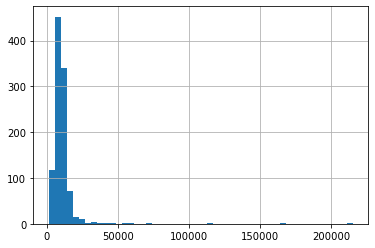

In [4]:
X_train['LotArea'].hist(bins=50)

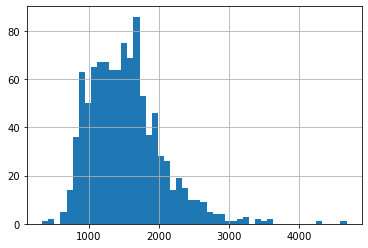

In [5]:
X_train['GrLivArea'].hist(bins=50)

In [6]:
lt = vt.LogTransformer(variables = ['LotArea', 'GrLivArea'])

lt.fit(X_train)

LogTransformer(base='e', variables=['LotArea', 'GrLivArea'])

In [7]:
# variables that will be transformed
lt.variables

['LotArea', 'GrLivArea']

In [8]:
train_t = lt.transform(X_train)
test_t = lt.transform(X_test)

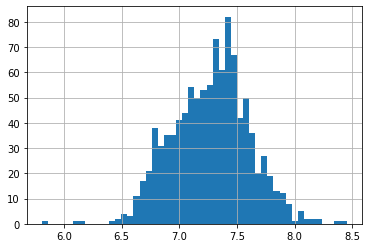

In [9]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

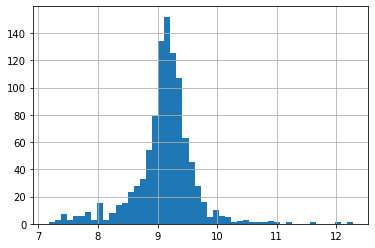

In [10]:
# transformed variable
train_t['LotArea'].hist(bins=50)

## ReciprocalTransformer

In [11]:
rt = vt.ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])

rt.fit(X_train)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

In [12]:
train_t = rt.transform(X_train)
test_t = rt.transform(X_test)

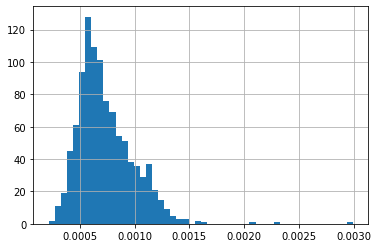

In [13]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

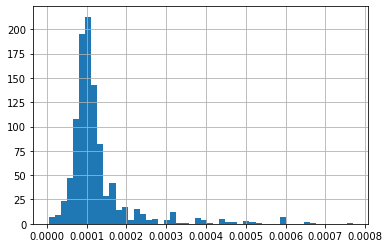

In [14]:
# transformed variable
train_t['LotArea'].hist(bins=50)

## PowerTransformer

In [15]:
et = vt.PowerTransformer(variables = ['LotArea', 'GrLivArea'])

et.fit(X_train)

PowerTransformer(exp=0.5, variables=['LotArea', 'GrLivArea'])

In [16]:
train_t = et.transform(X_train)
test_t = et.transform(X_test)

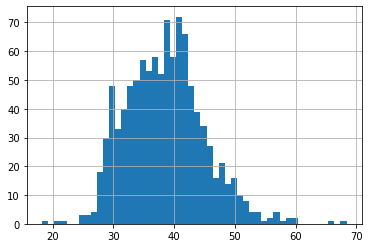

In [17]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

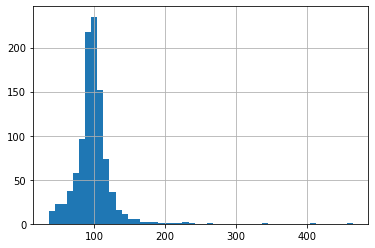

In [18]:
# transformed variable
train_t['LotArea'].hist(bins=50)

## BoxCoxTransformer

In [19]:
bct = vt.BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])

bct.fit(X_train)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [20]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict_

{'LotArea': 0.022716974992922984, 'GrLivArea': 0.06854346283829917}

In [21]:
train_t = bct.transform(X_train)
test_t = bct.transform(X_test)

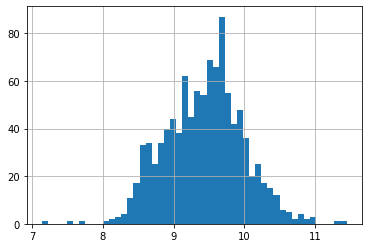

In [22]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

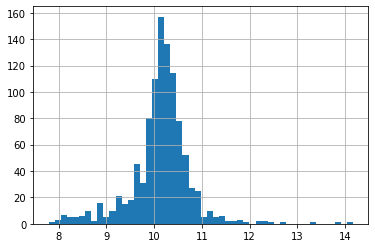

In [23]:
# transformed variable
train_t['LotArea'].hist(bins=50)

## YeoJohnsonTransformer

In [24]:
yjt = vt.YeoJohnsonTransformer(variables = ['LotArea', 'GrLivArea'])

yjt.fit(X_train)

YeoJohnsonTransformer(variables=['LotArea', 'GrLivArea'])

In [25]:
# these are the exponents for the BoxCox transformation
yjt.lambda_dict_

{'LotArea': 0.02258978732751055, 'GrLivArea': 0.06781061353154169}

In [26]:
train_t = yjt.transform(X_train)
test_t = yjt.transform(X_test)

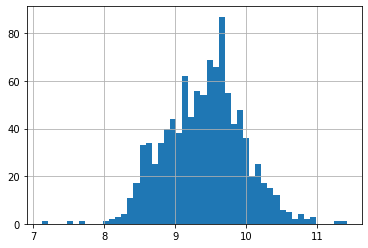

In [27]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

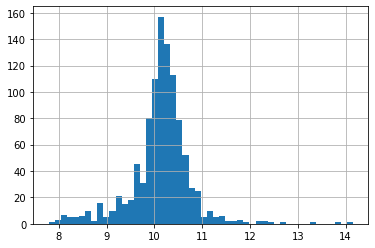

In [28]:
# transformed variable
train_t['LotArea'].hist(bins=50)